#  Life Expectancy 

* Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

* Importing DataSet

In [2]:
train = pd.read_csv("E:/Study & Work/5th Sem Books/CS550- Machine Learning/Assignments/1/life.csv")

In [3]:
train

,Country,Year,Status,life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
# NULL-Value check
train.isnull().sum()

Country                              0
Year                                 0
Status                               0
life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Simple Imputer for handling missing values in the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
train['life_expectancy']=imputer.fit_transform(train[['life_expectancy']])
train['Adult Mortality']=imputer.fit_transform(train[['Adult Mortality']])
train['Alcohol']=imputer.fit_transform(train[['Alcohol']])
train['Hepatitis B']=imputer.fit_transform(train[['Hepatitis B']])
train['BMI']=imputer.fit_transform(train[['BMI']])
train['Polio']=imputer.fit_transform(train[['Polio']])
train['Total expenditure']=imputer.fit_transform(train[['Total expenditure']])
train['Diphtheria']=imputer.fit_transform(train[['Diphtheria']])
train['GDP']=imputer.fit_transform(train[['GDP']])
train['Population']=imputer.fit_transform(train[['Population']])
train['thinness  1-19 years']=imputer.fit_transform(train[['thinness  1-19 years']])
train['thinness 5-9 years']=imputer.fit_transform(train[['thinness 5-9 years']])
train['Income composition of resources']=imputer.fit_transform(train[['Income composition of resources']])
train['Schooling']=imputer.fit_transform(train[['Schooling']])

In [6]:
train.isnull().sum()

Country                            0
Year                               0
Status                             0
life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

<AxesSubplot:xlabel='life_expectancy', ylabel='Count'>

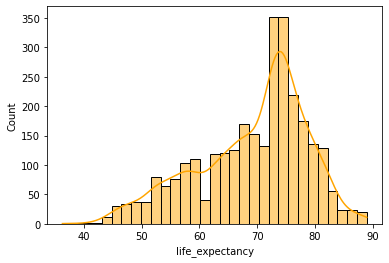

In [7]:
sns.histplot(train['life_expectancy'],kde=True,color='orange')

The majority of lifespan lies between 45 to 90 years, with an average lifespan of 69 years

In [8]:
train.head()

,Country,Year,Status,life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
import plotly.express as px

fig = px.choropleth(train,
                    locationmode='country names',
                    locations='Country',
                    color="life_expectancy", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )
fig.show()

In [10]:
train.columns

Index(['Country', 'Year', 'Status', 'life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
train.drop(["Country","Status"],axis="columns",inplace=True)

In [12]:
corr_data=train.corr()['life_expectancy'].sort_values()

In [13]:
corr_data.index

Index(['Adult Mortality', 'HIV/AIDS', 'thinness  1-19 years',
       'thinness 5-9 years', 'under-five deaths', 'infant deaths', 'Measles',
       'Population', 'Year', 'Hepatitis B', 'Total expenditure',
       'percentage expenditure', 'Alcohol', 'GDP', 'Polio', 'Diphtheria',
       'BMI', 'Income composition of resources', 'Schooling',
       'life_expectancy'],
      dtype='object')

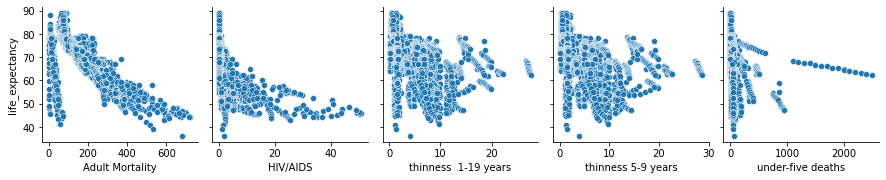

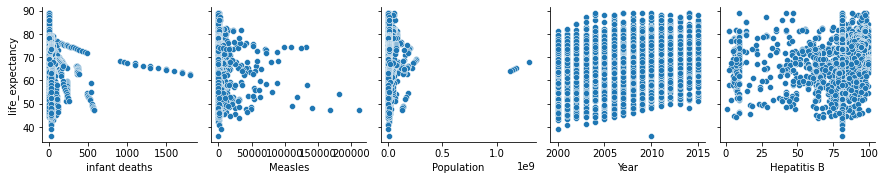

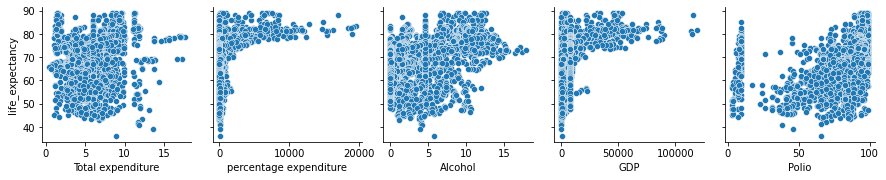

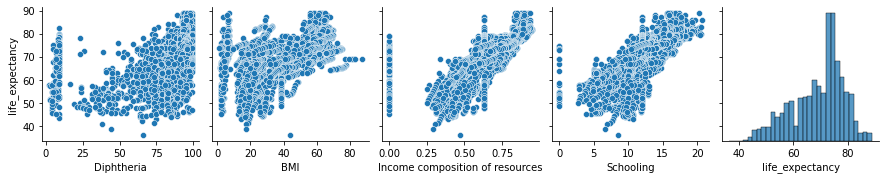

In [14]:
for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=train,
                x_vars = corr_data.index[i : i + 5],
                y_vars = ['life_expectancy'])

In [15]:
## Normalization
from sklearn.preprocessing import StandardScaler
nor = StandardScaler()
for i in train.columns:
    a = np.array(train[i]).reshape(-1,1)
    nor.fit(a)
    train[i] = nor.transform(a).reshape(1,-1)[0]

In [16]:
train.columns

Index(['Year', 'life_expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
train

,Year,life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,-2.622015,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,-0.535137,0.000449,1.037896,1.010651,-1.076989,-0.855681
2934,-0.979550,-2.600976,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,-0.535214,-0.002221,1.128934,1.122210,-1.023274,-0.763764
2935,-1.196326,-2.569417,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.565364,-0.234691,-0.828375,-0.796600,-0.979326,-0.610570
2936,-1.413102,-2.516818,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.527964,-0.007196,-0.737337,-0.707353,-0.979326,-0.671847


In [18]:
x=train.drop("life_expectancy",axis="columns")
y=train["life_expectancy"]

In [19]:
x

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,-0.535137,0.000449,1.037896,1.010651,-1.076989,-0.855681
2934,-0.979550,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,-0.535214,-0.002221,1.128934,1.122210,-1.023274,-0.763764
2935,-1.196326,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.565364,-0.234691,-0.828375,-0.796600,-0.979326,-0.610570
2936,-1.413102,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.527964,-0.007196,-0.737337,-0.707353,-0.979326,-0.671847


In [20]:
# KS TEST
from scipy.stats import kstest
for i in x.columns:
    print(kstest(x[i],"norm"))


KstestResult(statistic=0.08961294760384242, pvalue=5.581479364817968e-21)
KstestResult(statistic=0.0982882568403356, pvalue=3.6998585785356596e-25)
KstestResult(statistic=0.39858285353829537, pvalue=0.0)
KstestResult(statistic=0.12040624378654241, pvalue=1.4187688109082767e-37)
KstestResult(statistic=0.3551575651373471, pvalue=0.0)
KstestResult(statistic=0.2733151803948264, pvalue=2.025066110117946e-194)
KstestResult(statistic=0.41642969874913593, pvalue=0.0)
KstestResult(statistic=0.1263554103523643, pvalue=2.3905672548597337e-41)
KstestResult(statistic=0.39664592001466714, pvalue=0.0)
KstestResult(statistic=0.24054703353274487, pvalue=4.1763025511706554e-150)
KstestResult(statistic=0.0756405029450331, pvalue=4.579691208714677e-15)
KstestResult(statistic=0.2402405717243732, pvalue=1.016228543039767e-149)
KstestResult(statistic=0.3731792028565397, pvalue=0.0)
KstestResult(statistic=0.3164386616004805, pvalue=4.8103176680967335e-262)
KstestResult(statistic=0.40631940364043334, pvalue=0.

P-values were found to be less than 0.05

**Building Pipeline**

In [21]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [22]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())])

In [23]:
numeric_features=list(x.columns)
numeric_features

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [24]:
#Defining Preprocessor
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)])

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [26]:
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])

In [27]:
rf_model = pipeline.fit(x_train,y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Adult Mortality',
                                                   'infant deaths', 'Alcohol',
                                                   'percentage expenditure',
                                                   'Hepatitis B', 'Measles',
                                                   'BMI', 'under-five deaths',
                                                   'Polio', 'Total expenditure',
                                                   'Diphtheria', 'HIV/AIDS',
                              

In [28]:
predictions = rf_model.predict(x_test)
print ("Accuracy: ",r2_score(y_test, predictions))


Accuracy:  0.8191637976750249


**Performing K Cross validation**

In [29]:

lr=LinearRegression()
scores = cross_val_score(lr, x_train, y_train, cv=4)
print ("Cross validated scores:", scores)
    
predictions = cross_val_predict(lr, x_train, y_train, cv=4)


accuracy = metrics.r2_score(y_train, predictions)
print ("Cross-Predicted Accuracy:", accuracy)


Cross validated scores: [0.83187127 0.80211571 0.78372512 0.82386557]
Cross-Predicted Accuracy: 0.8115341678686432


**Feature Seleciton by Diffrent Methods**

* Using Lasso Method

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [33]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [34]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.200 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.229 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.207 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.275 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.213 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.267 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.296 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.263 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.358 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.288 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.376 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [35]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [36]:
importance = np.abs(coefficients)
importance

array([0.        , 0.24963916, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06937823, 0.        , 0.02500187,
       0.        , 0.06139981, 0.20001628, 0.01382946, 0.        ,
       0.01114477, 0.        , 0.14499097, 0.26204538])

In [37]:
# Selecting Revalent Features
np.array(list(x.columns))[importance>0]

array(['Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Income composition of resources',
       'Schooling'], dtype='<U31')

In [38]:
x.columns #Original Features

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [39]:
# Revalent Features
x=x.drop(['Year','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','under-five deaths','Total expenditure','Population','thinness 5-9 years'],axis="columns")

In [40]:
# Spliting the dataset for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
# Building Linear Regression Model
model2=LinearRegression()
model2.fit(x_train,y_train)
y_predic=model2.predict(x_test)

print("Error:",mean_squared_error(y_predic,y_test)," Accuracy:",model2.score(x_train,y_train))

Error: 0.200570600430755  Accuracy: 0.8022855557149876


* Using OLS (statsmodel.api) Method

In [42]:
#Original Features and Target
x=train.drop(["life_expectancy"],axis="columns")
y=train["life_expectancy"]

In [43]:
print(x.shape,y.shape)

(2938, 19) (2938,)


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2350, 19) (588, 19) (2350,) (588,)


In [46]:
import statsmodels.api as sm  
est=sm.OLS(y_train,x_train)
est2=est.fit()
print(est2.summary())


                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              543.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                        08:19:18   Log-Likelihood:                         -1358.1
No. Observations:                2350   AIC:                                      2754.
Df Residuals:                    2331   BIC:                                      2864.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [47]:
#Dropping Columns Manually
x_new=train.drop(['life_expectancy',"Year","percentage expenditure","Total expenditure","Population","thinness  1-19 years","thinness 5-9 years"],axis="columns")
y_new=train['life_expectancy']

In [48]:
# New DataSet with Revalent Features
xn_train,xn_test,yn_train,yn_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)

In [49]:
xn_train

,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Income composition of resources,Schooling
456,-0.312725,-0.257017,0.172933,0.666853,-0.211036,-0.643498,-0.262038,0.661714,0.663221,-0.224960,-0.332776,-0.124770,-0.028431
462,-0.103148,-0.257017,-0.202487,0.000000,-0.211036,-0.814144,-0.262038,0.361905,-3.102214,-0.185566,-0.473124,-0.320097,-0.304181
2172,-0.175694,-0.257017,1.488177,0.799696,-0.211036,0.310112,-0.262038,0.704544,0.705529,-0.323445,0.000000,0.514925,0.277958
2667,-1.223581,-0.231573,-0.846063,0.755415,-0.209640,1.052924,-0.243337,0.661714,0.663221,-0.323445,-0.250003,0.451444,0.829458
381,-0.562606,-0.257017,-1.142312,0.799696,-0.211036,-0.518023,-0.262038,0.704544,0.493988,-0.323445,0.712857,0.939761,0.400514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.852790,-0.257017,0.589214,0.046918,-0.210774,1.489577,-0.262038,0.576054,0.578604,-0.323445,1.167811,0.969060,0.860097
1095,0.985042,-0.223092,-0.355719,0.091199,-0.208768,-0.763954,-0.218402,-0.023565,0.028597,0.818980,-0.528316,-1.086755,-0.947597
1130,0.815768,-0.112835,0.377243,0.000000,-0.211036,-1.687451,-0.118663,-0.880163,-0.817568,0.188677,-0.522845,-0.827947,-1.100792
1294,-0.748001,-0.240054,1.199590,0.622572,0.746809,0.937487,-0.243337,0.618884,0.578604,-0.323445,1.515396,1.042308,1.043931


In [50]:
print(xn_train.shape,xn_test.shape,yn_train.shape,yn_test.shape)

(2350, 13) (588, 13) (2350,) (588,)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model1=LinearRegression()
model1.fit(xn_train,yn_train)
yn_predic=model1.predict(xn_test)

print("Error: ",mean_squared_error(yn_predic,yn_test))
print("Accuracy: ",model1.score(xn_train,yn_train))

Error:  0.17175298910674103
Accuracy:  0.8144713162923087


* Using Scikit-Learn Method

In [52]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [53]:
# Revalent Feature List
selector=SelectKBest(mutual_info_regression, k=10) # Selecting  Top 10 Feature columns
selector.fit(x,y)
f=list(x.columns[selector.get_support()])
print(f)

['Adult Mortality', 'infant deaths', 'BMI', 'under-five deaths', 'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [54]:
x=x[f]

In [55]:
x

,Adult Mortality,infant deaths,BMI,under-five deaths,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.791586,0.268824,-0.964715,0.255359,-0.323445,-0.525248,2.813130,2.773279,-0.725401,-0.579931
1,0.856072,0.285786,-0.989810,0.274060,-0.323445,-0.523083,2.881408,2.817902,-0.740050,-0.610570
2,0.831890,0.302749,-1.014905,0.292761,-0.323445,-0.521632,2.926927,2.862526,-0.769349,-0.641209
3,0.864132,0.328193,-1.040000,0.317696,-0.323445,-0.518723,2.972446,2.929461,-0.803531,-0.671847
4,0.888314,0.345155,-1.060076,0.342631,-0.323445,-0.564893,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...
2933,4.499494,-0.028022,-0.563194,-0.000223,6.275044,-0.535137,1.037896,1.010651,-1.076989,-0.855681
2934,4.435009,-0.036503,-0.583270,-0.006456,6.885650,-0.535214,1.128934,1.122210,-1.023274,-0.763764
2935,-0.739941,-0.044984,-0.603346,-0.012690,7.496256,-0.565364,-0.828375,-0.796600,-0.979326,-0.610570
2936,4.201249,-0.044984,-0.623422,-0.018924,7.949287,-0.527964,-0.737337,-0.707353,-0.979326,-0.671847


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [57]:
model4=LinearRegression()
model4.fit(x_train,y_train)
y_predic=model4.predict(x_test)

print("Error: ",mean_squared_error(y_predic,y_test))
print("Accuracy: ",model4.score(x_train,y_train))


Error:  0.2122412290255467
Accuracy:  0.7988683393389133
